# Brandan Keen
# MET 3601 Assignment #5

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed notebook, renamed as

`assignment5_lastname.ipynb`

via JupyterHub and Canvas. 

**DUE DATE: 25 October 2024 at 11:59 pm.**

Prior to turning in your notebook, please cleanup and comment your code for each problem. Be sure that your output is self-describing

In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Question #1
(30 points) Studying the terrain of a region is important to understanding the flow of water and topographic influences to rising and sinking motion within the atmopshere. In this problem you'll be investigating the terrain for the state of Colorado. Data retrieved from: https://www.ncei.noaa.gov/products/etopo-global-relief-model

1. (1 point) Use the `ETOPO1_gdal.nc` file, which is a netCDF version of a Digital Elevation Model with terrain in units of meters.
2. (4 point) Subset your domain to be over the Western U.S. (approximately from the Pacific Ocean to the Missippii River between the Canadian and Mexican border). Plot the figure (you don't need to save it however).
3. (10 points) Plot the terrain in units of feet as contours or color-filled contours on a map, which includes at least the state borders with the extent focused on just the state of Colorado
4. (5 points) Add the following cities to your figure as a star marker and add the city name as text near the marker
   - Denver, CO
   - Ft. Collins, CO
   - Grand Lake, CO
   - Aspen, CO
   - Steamboat Springs, CO
   - Grand Junction, CO
   - Pueblo, CO
   - Limon, CO
   - Colorado Springs, CO
<br><br>
   HINT: Don't hardwire your code! Create lists for lat, lon and the city then plot them all at once in a for loop. You will need to include the `transform=ccrs.PlateCarree` in your calls to the scatter plot and text. <br><br>
5. (5 points) Determine the highest and lowest elevations within the following bounding box (-102 to -109 E; 37 to 41 N; roughly the state of Colorado) and plot a marker at the highest and lowest elevation latitude/longitude points and plot the text giving the elevation values for each point.
6. (5 points) Appropriately title and label your plot. The figure asthetics (e.g., use of color, colorbar, linesize, linetype, linewidths, colormaps, etc.) will factor into the grading of the final figure.

Input:
   - Global Digital Elevation Model data; `ETOPO1_Ice_c_gmt4.grd` (located on the JupterHub in the share directory, i.e. `/share/share/`)

Output:
   - Figure Terrain contour (or color-filled) plot in units of feet with the nine city locations identified and labeled, along with the lables and symbols for the highest and lowest points.

Name the figure: colorado_topo_`your lastname.png`
   
Note: The original data file contains the terrain in units of meters above sea level.

/opt/conda/envs/fit24f/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


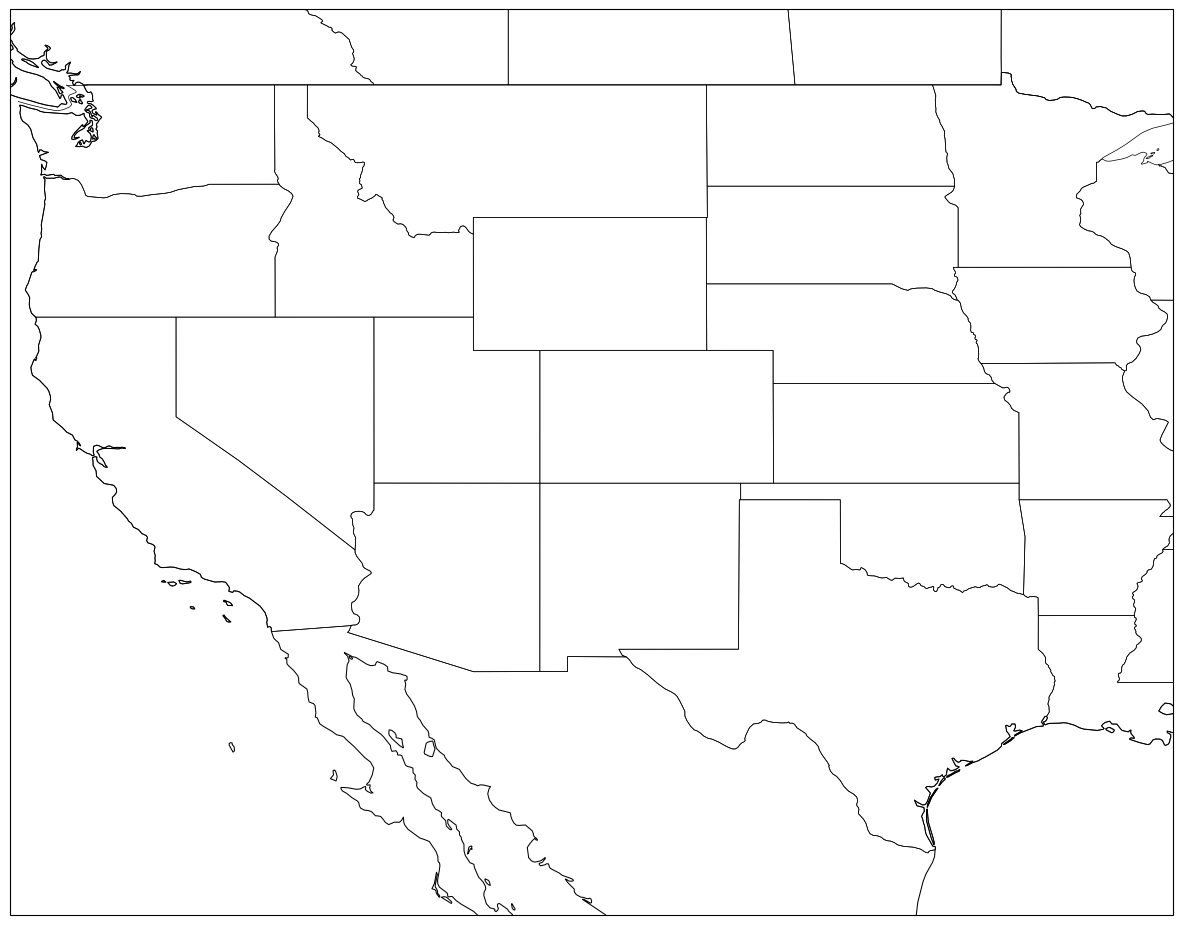

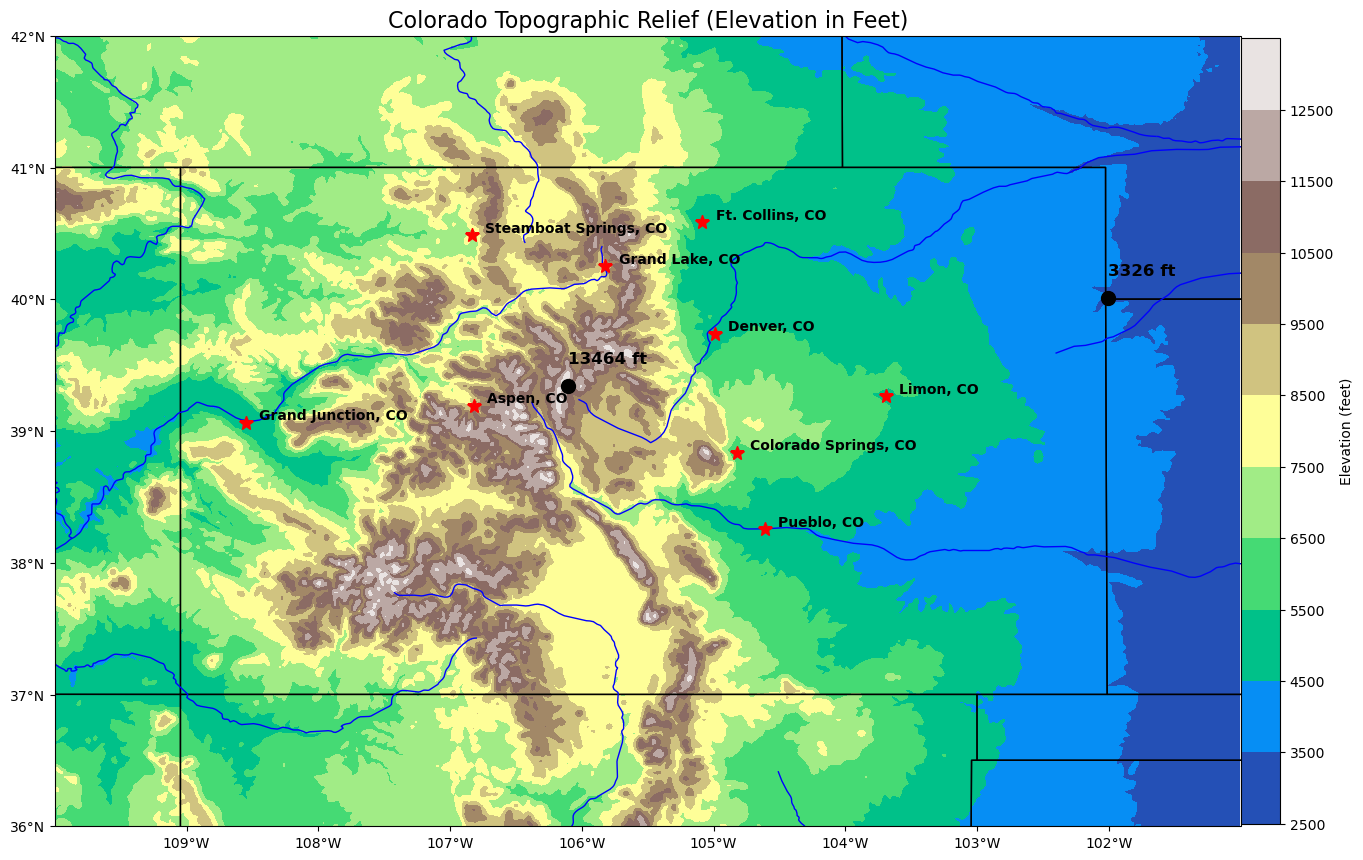

In [2]:
# Loading in dataset
ds = xr.open_dataset('/home/jovyan/share/ETOPO1_Ice_c_gmt4.grd')

# Checking dataset
#print(ds)

# Subsetting data for Western US
west_us_lon = slice(-125, -90)
west_us_lat = slice(24, 50)
western_us = ds.sel(x=west_us_lon, y=west_us_lat)

# Plotting Subset domain of Western US
plt.figure(1,figsize=(15, 12))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([-125,-90,24,50])

# Adding map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth = 0.75)
ax.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth = 0.5)
ax.add_feature(cfeature.STATES.with_scale('50m'),linewidth = 0.5)


# Subset domain for Colorado area
colo_lon_min,colo_lon_max = -110, -101
colo_lat_min,colo_lat_max = 36, 42
colo_lon = slice(colo_lon_min,colo_lon_max)
colo_lat = slice(colo_lat_min,colo_lat_max)
colorado_topo = ds.sel(x=colo_lon,y=colo_lat)

# Converting meters to feet
topo_feet = colorado_topo.z * 3.28084

# Checking variables
#print(colorado_topo)
#print(topo_feet)

# Creating filled contour topo map for Colorado
plt.figure(2,figsize=(18, 15))
ax2 = plt.subplot(111,projection=ccrs.PlateCarree())
ax2.set_extent([colo_lon_max,colo_lon_min,colo_lat_max,colo_lat_min])

# Setting Contours every 1000 ft
contour_min = 2500
contour_max = 13500
contour_range = np.arange(contour_min, contour_max+500, 1000)

# Plotting Colorado Topo data
cfill = ax2.contourf(colorado_topo.x,colorado_topo.y,topo_feet,
                     levels = contour_range,cmap='terrain',transform=ccrs.PlateCarree())


# Adding map features
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.add_feature(cfeature.BORDERS.with_scale('50m'))
ax2.add_feature(cfeature.STATES.with_scale('50m'))
ax2.add_feature(cfeature.RIVERS.with_scale('10m'),color='blue')

# Setting x and y ticks
lon = np.arange(-109, -101, 1)
lat = np.arange(36, 43, 1)  
ax2.set_xticks(lon, crs=ccrs.PlateCarree())
ax2.set_yticks(lat, crs=ccrs.PlateCarree())

# Labeling x and y ticks for Lat and Lon
ax2.set_xticklabels([f'{abs(x)}°W' for x in lon])
ax2.set_yticklabels([f'{y}°N' for y in lat])

# Adding colorbar
cbar = plt.colorbar(cfill, ax=ax2, orientation='vertical', pad = 0, shrink= .68, label='Elevation (feet)') 
cbar.set_ticks(np.arange(contour_min,contour_max,1000))

# Adding title
ax2.set_title('Colorado Topographic Relief (Elevation in Feet)', fontsize=16)


# Creating lists for cities, lats, lons
city = ['Denver, CO', 'Ft. Collins, CO', 'Grand Lake, CO', 'Aspen, CO',
        'Steamboat Springs, CO', 'Grand Junction, CO', 'Pueblo, CO', 'Limon, CO', 'Colorado Springs, CO']
city_lat = [39.7392, 40.5853, 40.2522, 39.1911, 40.4850, 39.0639, 38.2544, 39.2639, 38.8339]
city_lon = [-104.9903, -105.0844, -105.8217, -106.8175, -106.8317, -108.5506, -104.6091, -103.6920, -104.8214]

# Zipping city names, latitudes, and longitudes
city_lat_lon = zip(city, city_lat, city_lon)

# Plotting cities
for city_name, lat, lon in city_lat_lon:
    ax2.plot(lon, lat, marker='*', color='red', markersize=10, transform=ccrs.PlateCarree())
    ax2.text(lon + 0.1, lat, city_name, transform=ccrs.PlateCarree(), fontsize=10, fontweight='bold', verticalalignment='bottom', horizontalalignment='left')

# Defining domain for Colorado
bound_colo_lon = slice(-109, -102)
bound_colo_lat = slice(37, 41)

# Subsetting topo data for Colorado only
colorado_bounds = topo_feet.sel(x=bound_colo_lon, y=bound_colo_lat)

# Maximum elevation within Colorado
max_elevation = colorado_bounds.where(colorado_bounds == colorado_bounds.max(), drop=True)[0][0]

# Minimum elevation within Colorado
min_elevation = colorado_bounds.where(colorado_bounds == colorado_bounds.min(), drop=True)[0][0]

# Adding maximum marker
ax2.scatter(max_elevation.x, max_elevation.y, color='black', s=100, transform=ccrs.PlateCarree())
ax2.text(max_elevation.x, max_elevation.y + 0.15, 
         f'{int(max_elevation.values)} ft', color='black', fontsize=12, fontweight='bold', transform=ccrs.PlateCarree(), verticalalignment='bottom')

# Adding minimum marker
ax2.scatter(min_elevation.x, min_elevation.y, color='black', s=100, transform=ccrs.PlateCarree())
ax2.text(min_elevation.x, min_elevation.y + 0.15, 
         f'{int(min_elevation.values)} ft', color='black', fontsize=12, fontweight='bold', transform=ccrs.PlateCarree(), verticalalignment='bottom')

# Saving figure
plt.savefig('colorado_topo_Keen.png')

## Question #2
(30 points) Sea surface temperatures (SSTs) are an important feature that explains much about the distribution of temperature, precipitation, and thus vegetation around the globe. Owing to parts of the global circulation, a prominent variation in SSTs occurs in the Eastern Pacific Ocean (off the coast of Peru) that are related to changes in the Southern Oscillation Index and the phenomenon we call El Nino and La Nina. El Nino patterns are associated with warmer than normal (a warm anomaly) within the central or eastern Pacific Ocean along the equator. Your task is in evaluating the development of the warm SST anomalies associated with a significant El Nino event in 1997 by creating some graphics detailed below.

1. (2 points) Read in OISST daily mean data for 1997 (version 2) and the OISST daily long term mean (LTM) netCDF files.
2. (5 points) Plot the global SST daily mean values for the first day of Fall in 1997 (22 September 1997).
3. (5 points) Compute the anomaly values for the Eastern Pacific Ocean (25N to 25S; 130E to 70W) for
   - 1 February 1997
   - 1 April 1997
   - 1 June 1997
   - 1 August 1997
   - 1 October 1997
   - 1 December 1997
<br><br>
4. (10 points) Plot each day of the anomaly values on a separate axes on one figure (e.g., you should have six subplots) to demonstrate the evolution of the SST anomalies over the course of the year.
5. (3 points) Choose an appropriate colormap for viewing anomaly values (a diverging colormap would be most appropriate)
6. (5 points) Determine the maximum anomaly for the Eastern Pacific region for each month identified above and report the maximum value for each subplot in its title.

Input Data:
  - OISST (Optimum Interpolation SST v2; https://psl.noaa.gov/thredds/catalog/Datasets/noaa.oisst.v2.highres/catalog.html
     - Daily Means for 1997: http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1997.v2.nc
     - Daily LTM 1971-1990: https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.ltm.nc
     
Output:
  - Figure 1: Global SST for the first day of fall 1997
  - Figure 2: A multipanel plot containing the six monthly SST anomalies
  
Notes:
* The long term mean time string is not a numpy array. You will need to use the following select command instead `sel(time=cftime.DatetimeGregorian(1, month, day)`.
* For plotting the anomalies over the Eastern Pacific Ocean, you'll likely want to modify your plot projection to be centered over the international date line (180 degree).
* You do NOT have to compute all of the anomaly values before plotting. Make good use of looping and/or definitions to help you be effecient in coding your answer. Part of your score on this question will relate to how effecient your code is in accomplishing the task.

/opt/conda/envs/fit24f/lib/python3.11/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/conda/envs/fit24f/lib/python3.11/site-packages/xarray/core/indexing.py:630: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/opt/conda/envs/fit24f/lib/python3.11/site-packages/xarray/core/indexing.py:500: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


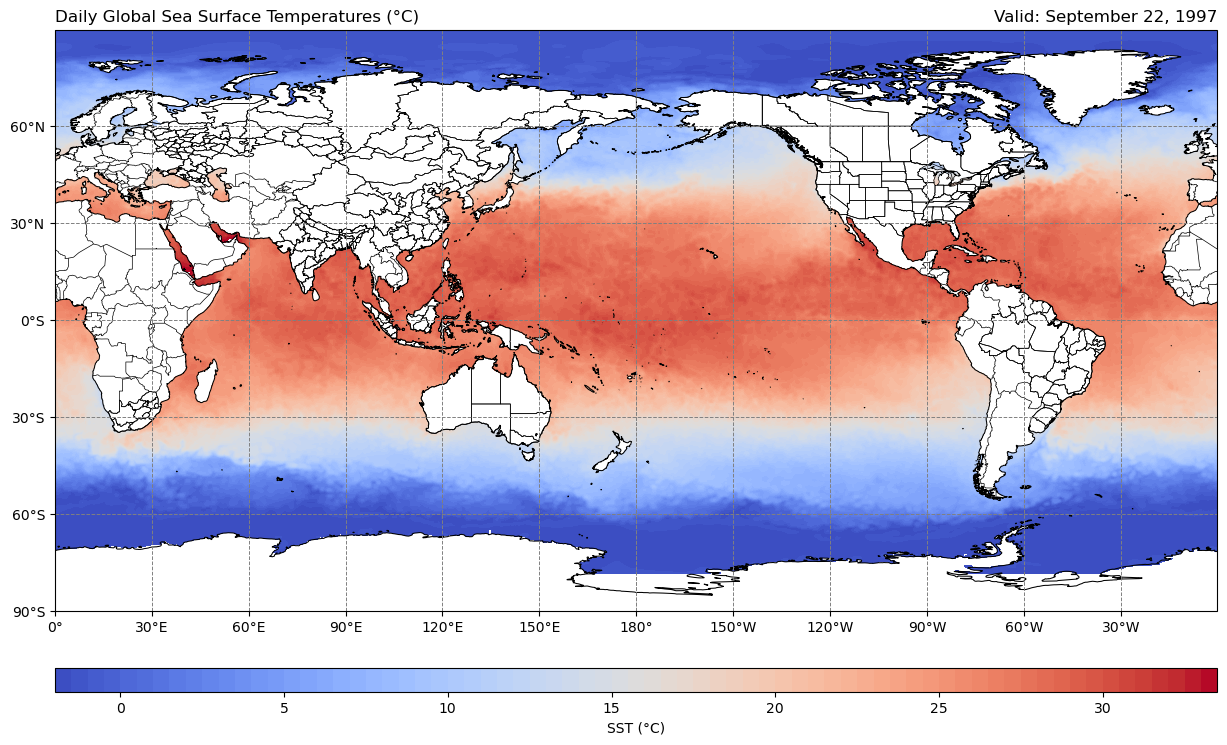

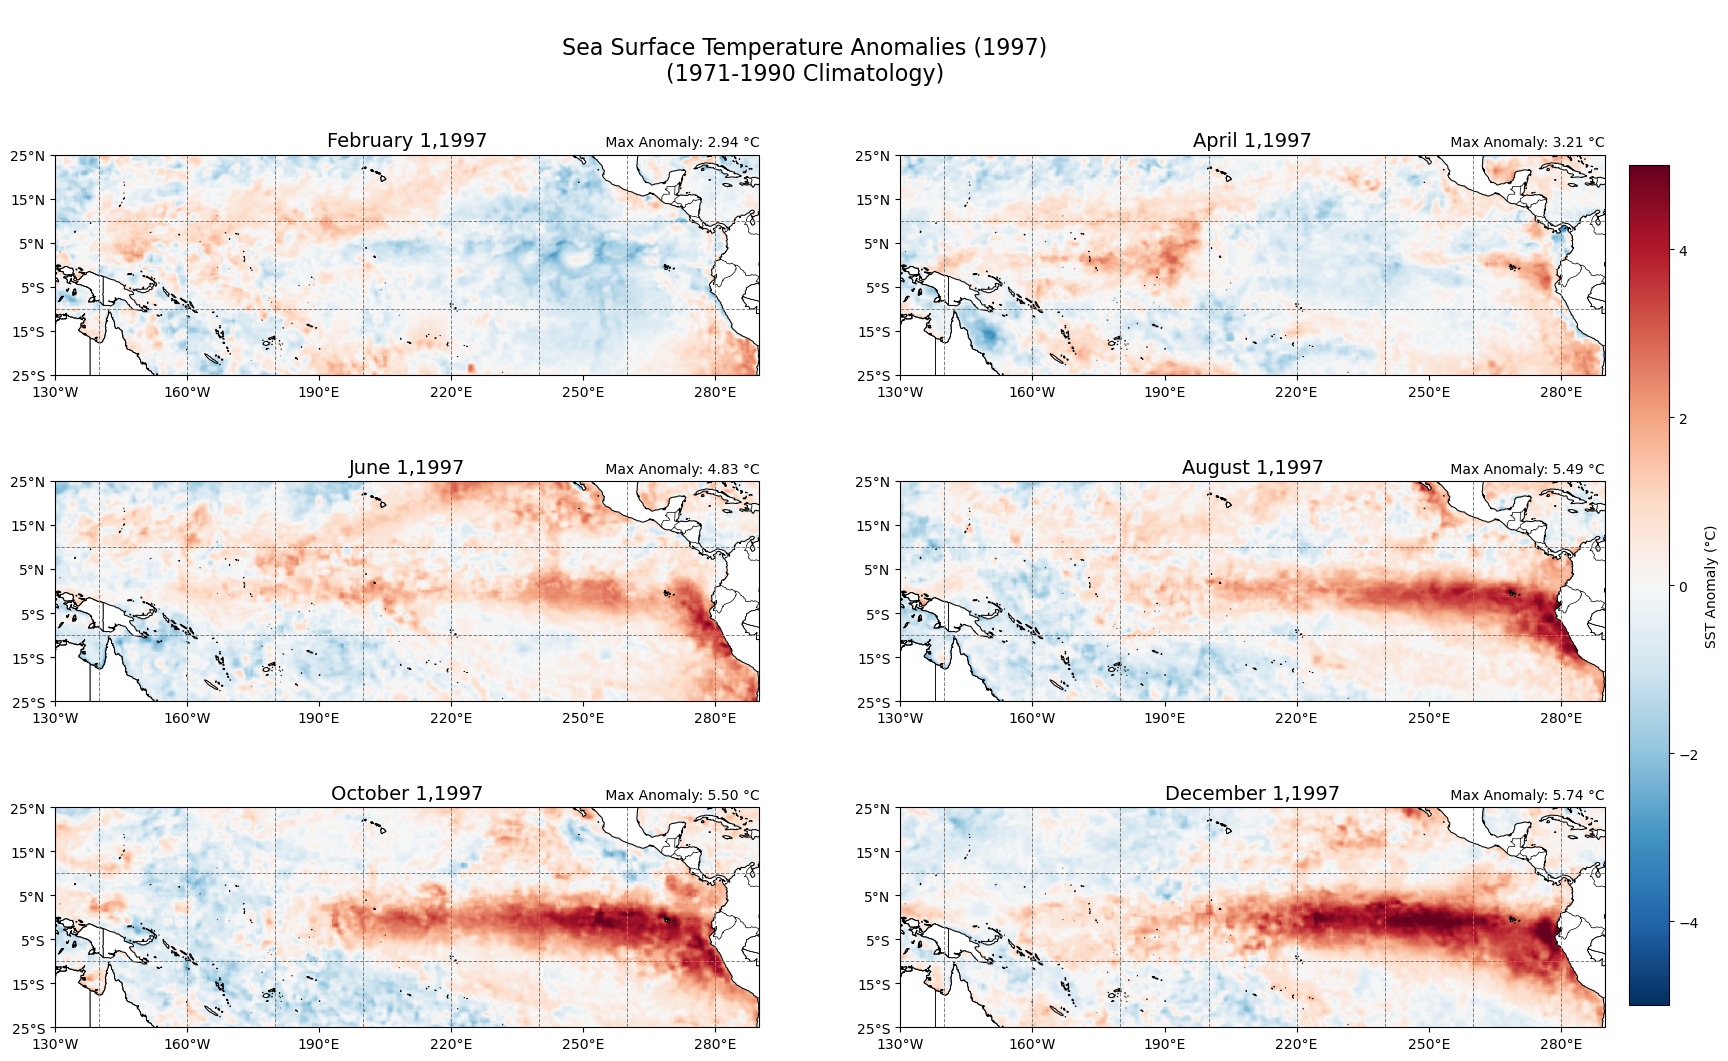

In [4]:
# Loading in OISST daily mean data for 1997 and LTM
oisst_1997 = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1997.nc')
oisst_ltm = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.ltm.nc')

# Subsetting SST data for first day of fall (September 22 1997)
fall_1997 = oisst_1997.sel(time=datetime(1997, 9, 22))

# Getting the minimum and maximum SST values
sst_min = fall_1997.sst.min().values
sst_max = fall_1997.sst.max().values

# Checking SST min/max
#print(sst_min,sst_max)

# Rounding minimum and maximum SST values for contour range
sst_min_contour = np.floor(fall_1997.sst.min().values)
sst_max_contour = np.ceil(fall_1997.sst.max().values)

# Plotting SST
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

# Defining contours
contour_levels = np.arange(sst_min_contour, sst_max_contour, 0.50)

# Creating contour plot for SST
cfill = ax.contourf(fall_1997.lon, fall_1997.lat, fall_1997.sst, contour_levels, cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree())

# Adding map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)

# Setting x and y ticks for latitude and longitude
lon_ticks = np.arange(-180, 180, 30)
lat_ticks = np.arange(-90, 90, 30)
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Labeling x and y ticks
ax.set_xticklabels([f'{abs(lon)}°{"E" if lon > 0 and lon != 180 else "W" if lon < 0 and lon!= -180 else ""}' for lon in lon_ticks])
ax.set_yticklabels([f'{abs(lat)}°{"N" if lat > 0 else "S"}'for lat in lat_ticks])

# Adding gridlines
ax.gridlines(draw_labels=False, linewidth=0.7, color='gray', linestyle='--',xlocs=np.arange(-180, 181, 30), 
             ylocs=np.arange(-90, 91, 30))
          
# Adding colorbar
cbar = plt.colorbar(cfill, ax=ax, orientation='horizontal', pad=0.05, aspect=50, label='SST (°C)')
cbar.set_ticks(np.arange(0,35,5))

# Converting date/time for title
date_title = fall_1997.time.dt.strftime('%B %d, %Y').values

# Adding title
ax.set_title('Daily Global Sea Surface Temperatures (°C)',loc='left', fontsize=12)
ax.set_title(f'Valid: {date_title}', loc='right', fontsize=12)

# Saving figure
plt.tight_layout
plt.savefig('global_sst_Keen.png')


# Defining Eastern Pacific region
epac_lat = slice(-25, 25)
epac_lon = slice(130, 290)

# List of dates for anomalies
dates = [
    datetime(1997, 2, 1),
    datetime(1997, 4, 1),
    datetime(1997, 6, 1),
    datetime(1997, 8, 1),
    datetime(1997, 10, 1),
    datetime(1997, 12, 1)
]

# Subsetting dataset for Eastern Pacific region and specific dates
sst_1997 = [oisst_1997['sst'].sel(time=date, lat=epac_lat, lon=epac_lon) for date in dates]
ltm_1971_1990 = [oisst_ltm['sst'].sel(time=cftime.DatetimeGregorian(1, date.month, date.day),
                                      lat=epac_lat, lon=epac_lon) for date in dates]

# Zipping SST and LTM
epac_sst_ltm = zip(sst_1997, ltm_1971_1990)

# Calculating SST anomalies for Eastern Pacific 
epac_sst_anomalies = [(sst - ltm) for sst, ltm in epac_sst_ltm]

# Defining figure
plt.figure(2, figsize=(20, 12))

# Looping through to plot the 6 SST anomaly dates
for i in range(1, 7):
    ax = plt.subplot(3, 2, i, projection=ccrs.PlateCarree(central_longitude=180))
    
    anomaly = epac_sst_anomalies[i-1]
    date = dates[i-1]
    
    # Determining largest anomaly value
    max_value = anomaly.max().values
    min_value = anomaly.min().values
    
    if max_value > abs(min_value):
        largest_anom = max_value
    else:
        largest_anom = min_value
        
    # Creating raster plot for SST anomalies
    cfill = ax.pcolormesh(anomaly.lon, anomaly.lat, anomaly, vmin=-5, vmax=5,
                          cmap=plt.cm.RdBu_r, shading='auto', transform=ccrs.PlateCarree())

    # Setting extent to Eastern Pacific
    ax.set_extent([130, 290, -25, 25], crs=ccrs.PlateCarree())

    # Adding map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)

    # Setting x and y ticks for latitude and longitude
    lon_ticks = np.arange(130, 291, 30)
    lat_ticks = np.arange(-25, 26, 10)
    ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
    ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

    # Labeling x and y ticks
    ax.set_xticklabels([f'{abs(lon)}°{"E" if lon > 180 else "W"}' for lon in lon_ticks])
    ax.set_yticklabels([f'{abs(lat)}°{"N" if lat > 0 else "S"}' for lat in lat_ticks])

    # Adding gridlines
    ax.gridlines(draw_labels=False, linewidth=0.7, color='gray', linestyle='--',
                 xlocs=np.arange(-180, 180, 20), ylocs=np.arange(-90, 90, 20))
    
    # Adding title to subplot
    ax.set_title(f'{date.strftime("%B %-d,%Y")}', fontsize=14)
    ax.set_title(f' Max Anomaly: {max_value:.2f} °C', fontsize=10, loc='right')

# Adding title to plot
print('\n')
print('\n')
plt.suptitle('\nSea Surface Temperature Anomalies (1997)\n(1971-1990 Climatology)', fontsize=16)

# Adding colorbar
cbar_ax = plt.gcf().add_axes([0.912, 0.15, 0.02, 0.7]) 
plt.colorbar(cfill, cax=cbar_ax, label='SST Anomaly (°C)', orientation='vertical')

# Saving figure
plt.tight_layout
plt.savefig('sst_anomalies_Keen.png')
